In [1]:
#Librerías que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integ
from scipy.optimize import root

# Integración numerica: métodos numéricos para resolver Ecuaciones Diferenciales ordinarias

Este tema está dedicado a presentar algunos de los métodos numéricos más empleados para la resolución de Ecuaciones Diferenciales Ordinarias (ODE).

Una ODE es una ecuación de la forma:

$$
\dot{y} = f(t,y),
$$

donde la incógnita $y(t)$ es una función, y $\dot{y}(t)$ denota la derivada de $y(t)$ con respecto a $t$.

### Derivadas
Hay varias formas de denotar la derivada de una función que son de uso común. Las más corrientes son:

$$
\dot{y},\quad \frac{dy}{dt},\quad y'
$$

para la derivada primera, y

$$
\ddot{y},\quad \frac{d^2y}{dt^2},\quad y''
$$

para la derivada segunda.

Usaremos las tres escrituras indistintamente.

## Problema de valor inicial

Una ODE tiene infinidad de soluciones; pero en muchas circunstancias sólo existe una solución que en un valor de $t$ dado valga una cantidad predeterminada. Esto se conoce como **problema de valor inicial**:

$$
\left\{ \begin{array}\dot{y}(t) = f(t,y(t)) \\
         y(t_0)=y_0 \end{array}\right.
$$

Por ejemplo, la ecuación

$$ \dot{y} = 3y(t)$$

tiene infinitas soluciones: para cada valor de $C$, 

$$ y(t) = Ce^{3t} $$

es solución.

Pero si imponemos que $y(0)=5$ entonces hay una única solución con esta propiedad:

$$ y(t) = 5e^{3t}. $$

## Ejercicio

El problema de valor inicial no tiene siempre solución única. Comprueba que es el caso para:

$$ \dot{y}=\sqrt{y},\quad y(0)=0. $$

> Esta ecuación admite la solución constante y=0, y además integrando por variables separadas obtenemos otra solución:
$$\dot{y} = \sqrt{y} \Rightarrow \frac{\dot{y}}{\sqrt{y}} = 1 \Rightarrow
\frac{\dot{y}}{\sqrt{y}} = 1 \Rightarrow \int \frac{\dot{y}}{\sqrt{y}}
{dt} = \int 1 {dt} \Rightarrow \int y^{- \frac{1}{2}} {dy} =
\int 1 {dt} \Rightarrow \frac{y^{\frac{1}{2}}}{\frac{1}{2}} - 0 = t - 0
\Rightarrow y = \frac{t^2}{4}$$
> En realidad, admite infinitas soluciones:
$$y (t) = \left\{\begin{array}{ll}
  0 & 0 \leqslant t \leqslant t_0\\
  \frac{(t - t_0)^2}{4} & t > t_0
\end{array}\right.$$

## Ecuación funcional
En la ecuación anterior $\dot{y} = f(t,y)$, la incógnita es una función $y$.
No sólo no conocemos el valor de la función $y(t)$ para cada instante temporal $t$, sino que además no sabemos para qué valores de $t$ está definida (en otras palabras, no conocemos su _dominio_).

### Ejercicio

Encuentra todas las soluciones de la ecuación diferencial ordinaria:

$$\dot{y} = y^2. $$

> Nos piden todas las soluciones, no sólo las de un problema de valor inicial (PVI) concreto. Así que probamos con todos los PVI posibles añadiendo una condición genérica $y(t_0) = y_0$, e integramos por separación de variables
$$\frac{\dot{y}}{y^2} = 1 \Rightarrow \frac{\dot{y}}{y^2} = 1 \Rightarrow
\int_{t_0}^t \frac{\dot{y}}{y^2} {dt} = \int_{t_0}^t 1 {dt}
\Rightarrow \int_{y_0}^{y (t)} y^{- 2} {dy} = \int_{t_0}^t 1 {dt}
\Rightarrow \frac{1}{- y} | _{y_0}^{y (t)} = t - t_0 \Rightarrow -
\frac{1}{y} + \frac{1}{y_0} = t - t_0 \Rightarrow y = \frac{1}{\frac{1}{y_0} -
t + t_0}$$
> Observamos que las soluciones no están definidas para cualquier tiempo $t$, sino que cuando $t$ se acerca a $t_0 + \frac{1}{y_0}$, la solución $y(t)$ crece sin límite:
$$\lim_{t \rightarrow t_0 + \frac{1}{y_0}} y (t) = + \infty$$
> Luego la solución al PVI $\dot{y} = y^2, y(t_0) = y_0$ es la función $y\rightarrow \frac{1}{\frac{1}{y_0} -
t + t_0}$, definida en el intervalo $(t_0, t_0+1/t_0)$.
> (extra )La función $f(t, y)=y^2$ que define la EDO es Lipschitz en la $y$ sólo mientras $y$ se mantenga acotada, porque la derivada parcial $\frac{\partial f}{\partial y}=2y$ es acotada si y sólo si $y$ está acotado. Por tanto, el [teorema de existencia y unicidad local](https://en.wikipedia.org/wiki/Ordinary_differential_equation#Existence_and_uniqueness_of_solutions) dice que la solución está definida, pero no garantiza que esté definida para todo tiempo.

## Interpretación geométrica

Una ODE 

$$\dot{y} = f(t,y)$$

puede interpretarse geométricamente como la prescripción en cada instante de tiempo del valor de la pendiente de la gráfica de la función $y(t)$ (en función del valor de $y(t)$).

Por ejemplo, la ecuación 

$$ \dot{y} = y^2-y-1 $$

tiene gráficamente estas soluciones.

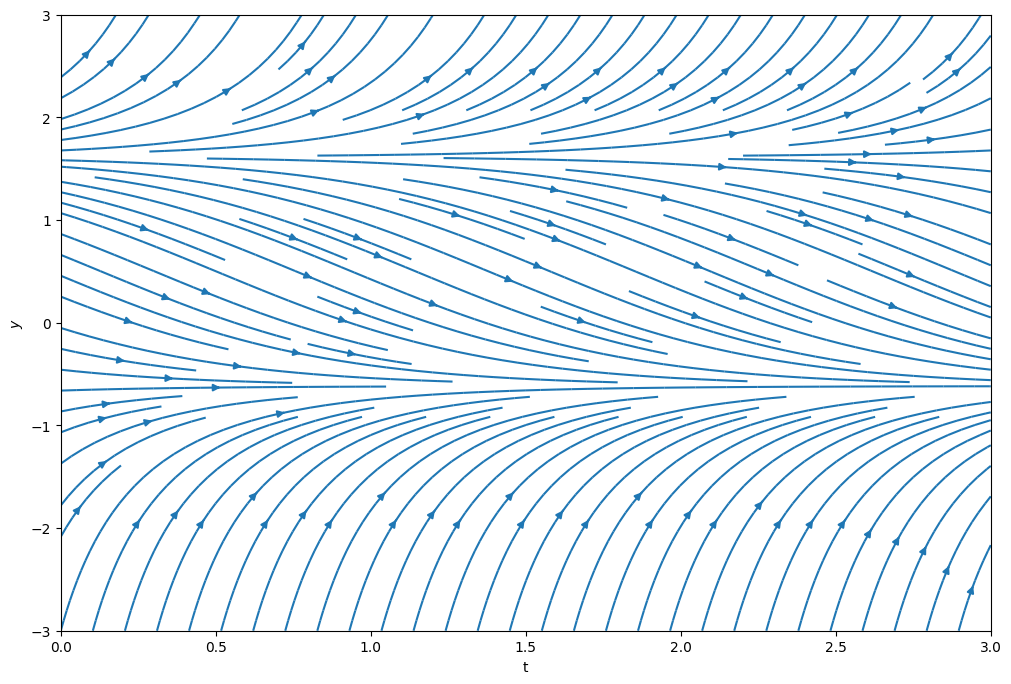

In [2]:
plt.figure(figsize=(12,8))


w = 3
X,Y = np.meshgrid(np.linspace(0, w, 100), np.linspace(-w, w, 100))

T = X**0
V = Y**2-Y-1

plt.streamplot(X, Y, T, V, density = [1,2])
plt.xlabel('t')
plt.ylabel('$y$')
plt.show()


Pero sólo hay una que cumpla 

$$ y(0) = 1$$

In [3]:
plt.figure(figsize=(12,8))


w = 3
X, Y = np.meshgrid(np.linspace(0, w, 100), np.linspace(-w, w, 100))

T = X**0
V = Y**2-Y-1


def fun(t,y):
    return y**2-y-1

t0,tf = t_span = [0,3]
# y = (theta, v)
y0 = [1.5]
ntimes = 200
ts = np.linspace(t0, tf, ntimes)

#sol = integ.solve_ivp(
#    fun, t_span, y0, 
#    method='RK45')

sol_denso = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45',
    t_eval=ts)

plt.plot(sol_denso['t'], sol_denso['y'][0,:], 'r-', linewidth=3,
         label='Solución con $y(0)=1$')
plt.xlabel('t')
plt.ylabel('$y$')
plt.legend()
plt.title('Gráfica de $y(t)$')
plt.streamplot(X, Y, T, V, density = [1,2])
plt.show()

- Una ecuación es **lineal** / **no lineal** si $f(t,y)$ es lineal / no lineal en la variable $y$.
- Una ecuación es **autónoma** / **no autónoma** si $f(t,y)$ no depende explícitamente de $t$, $f(y)$, o depende explícitamente de $t$

## Puntos de equilibrio o soluciones estacionarias

Consideramos una ecuación autónoma:

$$ \dot{y} = f(y), $$

supongamos que $y_0$ es una raíz de $f$:

$$ f(y_0) = 0. $$

Entonces

$$ y(t) = y_0 $$

es solución de la ODE. Esta solución se llama **punto de equilibrio** o **solución estacionaria** de la ecuación.

### Ejemplo

Consideramos la ecuación logística:

$$ \dot{y} = y(1 - y). $$

Esta ecuación tiene dos puntos de equilibrio:

$$y_0 = 0,\quad y_0 = 1. $$

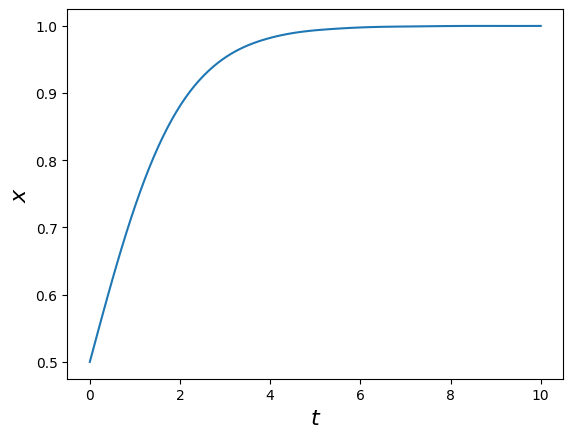

In [4]:
def logistic(t, y):
    return y*(1 - y)

t0, tf = 0.0, 10.0
ts = np.linspace(t0, tf, 100) # values of independent variable
y0 = [0.5] # an initial condition, x(0) = x0
sol = integ.solve_ivp(logistic, [0.0, 10.0], y0, t_eval=ts)
# 'solve_ivp' returns a dictionary with information about the integration
#  sol['y'] has the 'y' values, at the times in ts.
plt.xlabel('$t$', fontsize=16); plt.ylabel('$x$', fontsize=16)
plt.plot(sol['t'], sol['y'][0,:])

Text(0, 0.5, '$x$')

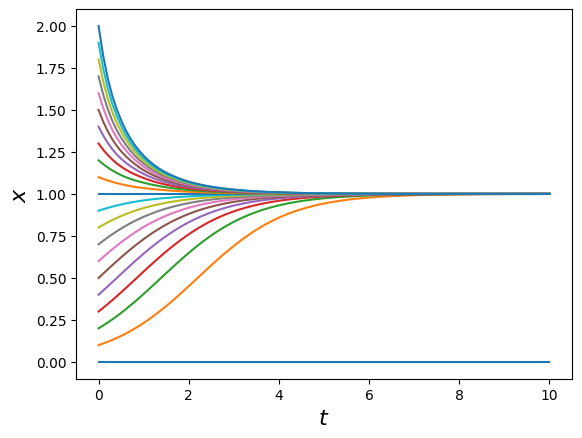

In [5]:
# Plot curves for several initial conditions
ics = np.linspace(0.0, 2.0, 21) # a list of initial conditions
t0, tf = 0.0, 10.0
ts = np.linspace(t0, tf, 100) # values of independent variable

for y0 in ics:
    sol = integ.solve_ivp(logistic, [0.0, 10.0], [y0], t_eval=ts)
    # 'solve_ivp' returns a dictionary with information about the integration
    #  sol['y'] has the 'y' values, sol['t'] the times
    #  sol['t'] is the array ts, since we passed the argument `t_eval`
    plt.plot(sol['t'], sol['y'][0,:])
plt.xlabel('$t$', fontsize=16); plt.ylabel('$x$', fontsize=16)


- El punto de equilibrio $y_0=1$ es **estable**: las soluciones que arrancan en $t=0$ en un valor cercano a $y_0=1$ se acercan a $1$ cuando $t\to\infty$.

- El punto de equilibrio $y_0=0$ es **inestable**: las soluciones que arrancan en $t=0$ en un valor cercano a $y_0=0$ se alejan de $0$ cuando $t\to\infty$.

### Ejercicio

Encuentra los puntos de equilibrio de la ecuación

$$ \dot{y} = y^2-y-1 $$

del ejemplo anterior.

> Los puntos de equilibrio son soluciones constantes $y(t)=c$. Pero $y(t)=c$ implica $\dot{y}(t)=0$, luego $c^2-c-1=0$. Obtenemos los posibles valores de la fórmula para las soluciones de la ecuación de segundo orden: $c=\frac{1\pm\sqrt{5}}{2}$
> Comprobamos que estos dos valores corresponden a soluciones constantes dibujándolas en el diagrama de corrientes:

In [6]:
plt.figure(figsize=(12,8))


w = 3
X, Y = np.meshgrid(np.linspace(0, w, 100), np.linspace(-w, w, 100))

T = X**0
V = Y**2-Y-1


def fun(t,y):
    return y**2-y-1

t0,tf = t_span = [0,3]
# y = (theta, v)
equilibrio_1 = [(1+np.sqrt(5))/2]
equilibrio_2 = [(1-np.sqrt(5))/2]
ntimes = 200
ts = np.linspace(t0, tf, ntimes)

#sol = integ.solve_ivp(
#    fun, t_span, y0, 
#    method='RK45')

sol_denso_1 = integ.solve_ivp(
    fun, t_span, equilibrio_1,
    method='RK45',
    t_eval=ts)

sol_denso_2 = integ.solve_ivp(
    fun, t_span, equilibrio_2,
    method='RK45',
    t_eval=ts)

plt.plot(sol_denso['t'], sol_denso_1['y'][0,:], 'r-', linewidth=3,
         label='Solución con $y(0)=%s$'%equilibrio_1)

plt.plot(sol_denso['t'], sol_denso_2['y'][0,:], 'r-', linewidth=3,
         label='Solución con $y(0)=%s$'%equilibrio_2)
plt.xlabel('t')
plt.ylabel('$y$')
plt.legend()
plt.title('Gráfica de $y(t)$')
plt.streamplot(X, Y, T, V, density = [1,2])
plt.show()

# Sistemas de ecuaciones diferenciales ordinarias

Usamos la misma notación para referirnos a **sistemas de ecuaciones diferenciales ordinarias**:
$$
\dot{y} = f(t,y)
$$
ahora $y$ es una función vectorial (toma valores en $\mathbb{R}^d$) de una sóla variable real $t$, que se suele identificar con el tiempo, pero también puede ser una variable espacial (por ejemplo si estudiamos la tensión a lo largo de una viga).

## Ejemplo: sistema de Lotka-Volterra

El sistema de Lotka-Volterra modela la dinámica de dos poblaciones en un ecosistema: una *presa* $x(t)$ y un *depredador* $y(t)$:

$$
\dot{x} = ax - bxy,\quad
\dot{y} = -cy + dxy.
$$

Los parámetros $a,b,c,d>0$ del modelo depeden de la interacción entre las dos especies. ¿Se parece un poco a la ecuación logística, no?

In [7]:
integ.solve_ivp?

Signature:
integ.solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    args=None,
    **options,
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a 1-D independent variable (time), y(t) is an
N-D vector-valued function (state), and an N-D
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note
that for stiff ODE solvers, the right-hand side must be
complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
To solve a problem in the complex domain, pass y0 with a complex data type.
Another option always available is to rewrite yo

In [8]:
def dZ_dt(t, Z, a=1, b=1, c=1, d=1): # a,b,c,d optional arguments.
    x, y = Z[0], Z[1]
    dxdt, dydt = x*(a - b*y), -y*(c - d*x)
    return np.array([dxdt, dydt])

t0, tf = 0.0, 12.0
ts = np.linspace(t0, tf, 20) # values of independent variable
Z0 = [1.5, 1.0] # initial conditions for x and y
# use optional argument 'args' to pass parameters to dZ_dt
sol = integ.solve_ivp(dZ_dt, [t0, tf], Z0, args=(1,1,1,1))
#sol = integ.solve_ivp(dZ_dt, [t0, tf], Z0, t_eval=ts, args=(1,1,1,1))

prey = sol['y'][0,:] # first column
predators = sol['y'][1,:] # second column

In [9]:
plt.plot(sol['t'], prey, "+", label="Conjejos")
plt.plot(sol['t'], predators, "x", label="Zorros")
plt.xlabel("Tiempo", fontsize=14)
plt.ylabel("Población", fontsize=14)
plt.legend();

## Diagrama de fases

En lugar de representar las gráficas de $x(t)$ y $y(t)$ por separado, podemos también pintar las curvas $(x(t),y(t)$ para distintas elecciones de los datos iniciales $(x_0,y_0)$.

Esto se conoce como **diagrama de fases**. 

Como el sistema es autónomo, las trayectorias **no dependen del instante inicial** $t_0$, sólo dependen del dato inicial.

In [10]:
def dZ_dt(t, Z, a=1, b=1, c=1, d=1): # a,b,c,d optional arguments.
    x, y = Z[0], Z[1]
    dxdt, dydt = x*(a - b*y), -y*(c - d*x)
    return np.array([dxdt, dydt])


In [11]:
t0,tf = 0.0,10.0
X0 = [1,2]
ts = np.linspace(t0, tf, 300)
sol = integ.solve_ivp(dZ_dt, [t0, tf], X0, t_eval = ts)

In [12]:
fig = plt.figure()
fig.set_size_inches(6,6) 

plt.plot(sol['t'], sol['y'][0,:])
plt.plot(sol['t'], sol['y'][1,:])


plt.show()

plt.plot(sol['y'][0,:], sol['y'][1,:])

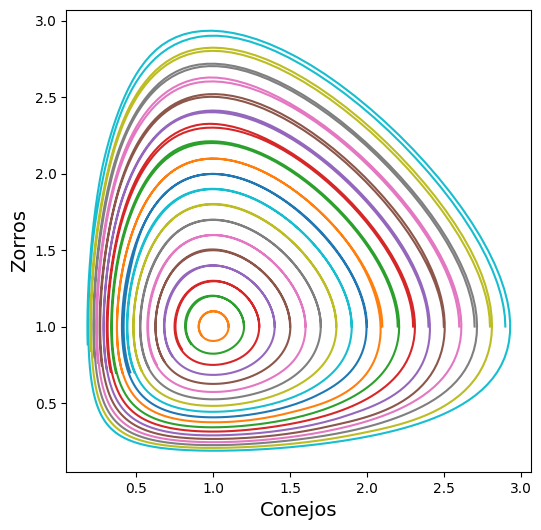

In [13]:
fig = plt.figure()
fig.set_size_inches(6,6) # Square plot, 1:1 aspect ratio
ics = np.arange(1.0, 3.0, 0.1) # initial conditions
ts = np.linspace(t0, tf, 300) # values of independent variable
for r in ics:
    Z0 = [r, 1.0] # initial conditions for x and y
    # use optional argument 'args' to pass parameters to dZ_dt
    sol = integ.solve_ivp(dZ_dt, [t0, tf], Z0, 'RK45', t_eval=ts, args=(1,1,1,1))
    plt.plot(sol['y'][0,:], sol['y'][1,:])

plt.xlabel("Conejos", fontsize=14)
plt.ylabel("Zorros", fontsize=14)
plt.show()

Observamos que las órbitas del espacio de fases no cierran de forma perfecta, pero podría ser un error numérico... así que probamos a disminuir la tolerancia. En la documentación de `solve_ivp` indica cómo.

In [14]:
integ.solve_ivp?

Signature:
integ.solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    args=None,
    **options,
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a 1-D independent variable (time), y(t) is an
N-D vector-valued function (state), and an N-D
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note
that for stiff ODE solvers, the right-hand side must be
complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
To solve a problem in the complex domain, pass y0 with a complex data type.
Another option always available is to rewrite yo

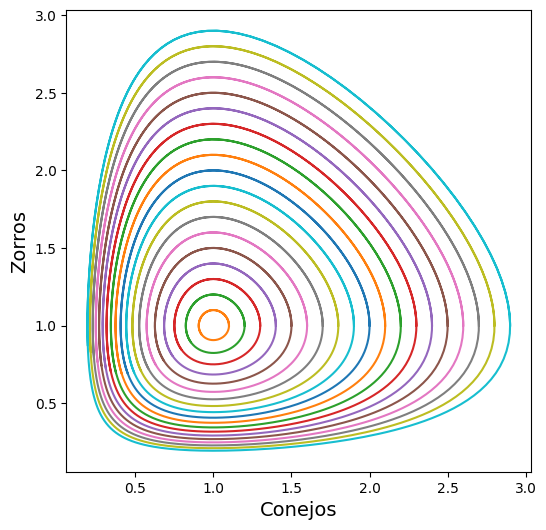

In [15]:
fig = plt.figure()
fig.set_size_inches(6,6) # Square plot, 1:1 aspect ratio
ics = np.arange(1.0, 3.0, 0.1) # initial conditions
ts = np.linspace(t0, tf, 300) # values of independent variable
for r in ics:
    Z0 = [r, 1.0] # initial conditions for x and y
    # use optional argument 'args' to pass parameters to dZ_dt
    sol = integ.solve_ivp(dZ_dt, [t0, tf], Z0, 'RK45', rtol=1e-7, t_eval=ts, args=(1,1,1,1))
    plt.plot(sol['y'][0,:], sol['y'][1,:])

plt.xlabel("Conejos", fontsize=14)
plt.ylabel("Zorros", fontsize=14)
plt.show()

Ahora las trayectorias sí parecen cerradas... y consultamos por ejemplo en la [wikipedia](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) que de hecho lo son.

## Ecuaciones de orden superior

Una ecuación diferencial puede involucrar derivadas de orden superior a la primera derivada.

Por ejemplo, la ecuación del péndulo sin rozamiento:

$$
m\cdot l\cdot\ddot \theta(t)+m\cdot g \cdot \sin(\theta(t))=0.
$$

Esta ecuación se puede transformar en un sistema equivalente de dos ecuaciones de primer orden:

$$
\dot{\theta}(t)=v(t),\quad \dot{v}(t)=-\frac{g}{l}\sin(\theta(t)).
$$

En el caso de ecuaciones de orden dos, o más generalmente, de sistemas de primer orden con dos incógnitas, es muy ilustrativo representar gráficamente su **diagrama de fases**. 

En el ejemplo que acabamos de introducir, el diagrama de fases consiste en representar gráficamente las trayectorias $(\theta(t),v(t))$ para una o distintas soluciones, y hacernos así una idea de la dinámica del sistema.


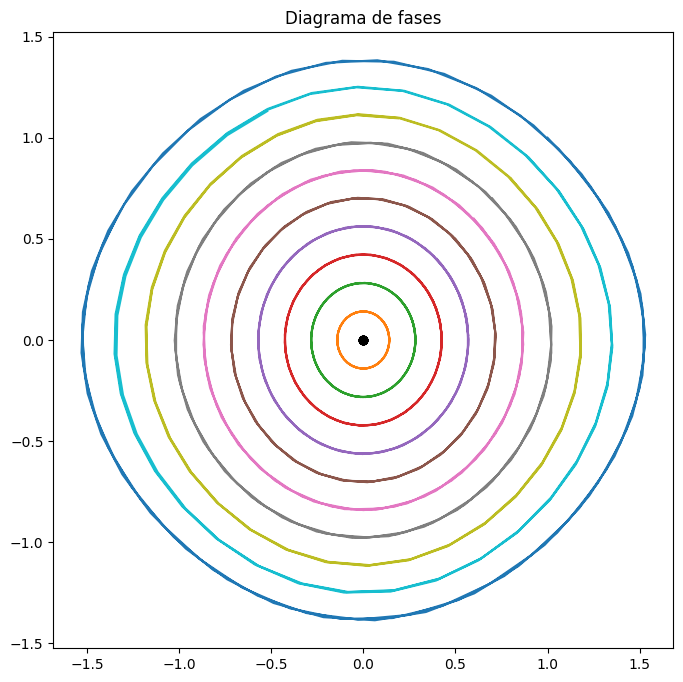

In [16]:


plt.figure(figsize=(8,8))



def P(t,ys):
    the, v = ys
    return [
           v, 
        -np.sin(the)
    ]

def P_stat(ys):
    the, v = ys
    return [
            v, 
            -np.sin(the)
    ]

for v0 in np.linspace(0,1,11):
    t0,tf = t_span = [0,20]

    y0 = [v0,v0]
    nframes = 100
    ts = np.linspace(t0, tf, nframes)

    sol = integ.solve_ivp(
        P, t_span, y0, 
        method='RK45',
        t_eval=ts
    )

    plt.plot(sol['y'][0,:], sol['y'][1,:])

    
    
    res = root(P_stat, [1,1], method='hybr')
    rx = res['x']
    plt.plot(rx[0], rx[1], 'ko')
    
plt.title('Diagrama de fases')
plt.show()

**Es importante no confundir el diagrama de fases con la gráfica de la solucion**

En este caso, la primera componente de la solución, $\theta(t)$, tiene por gráfica:


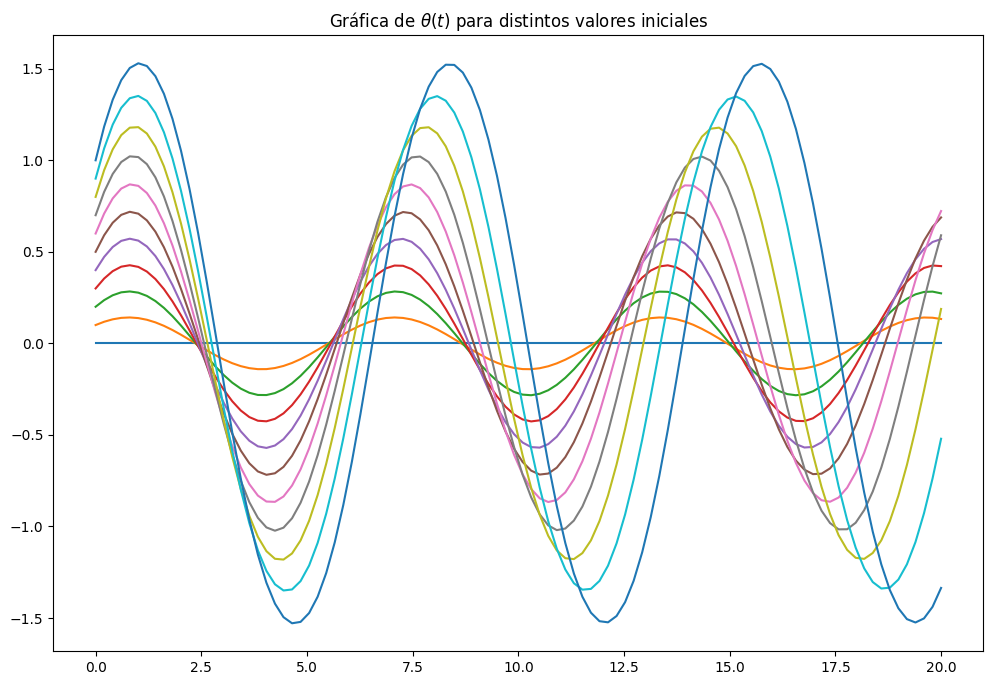

In [17]:
plt.figure(figsize=(12,8))

for v0 in np.linspace(0,1,11):
    t0,tf = t_span = [0,20]

    y0 = [v0,v0]
    nframes = 100
    ts = np.linspace(t0, tf, nframes)

    sol = integ.solve_ivp(
        P, t_span, y0, 
        method='RK45',
        t_eval=ts
    )

    plt.plot(sol['t'], sol['y'][0,:])
    
plt.title("Gráfica de $\\theta(t)$ para distintos valores iniciales")
plt.show()

## Método de Euler

El **método de Euler** aproxima la solución de un problema de valor inicial anterior mediante la iteración:

$$\begin{array}{lll}
  t_k &=& t_0 + h\cdot k\\
  y_{k+1} & = & y_k + h\cdot f (t_k, y_k)\\
  y_0 & = & y(t_0)=y_0,
\end{array}$$

que corresponde a reemplazar la variable continua $t$ por una sucesión discreta de tiempos $(t_k)$ equiespaciados con paso $h>0$.

Este método **converge**; esto quiere decir que el **error global**

$$
e_n := y_n - y(t_n)
$$

que resulta de comparar la solución aproximada $y_n$ con la solución exacta $y(t_n)$ tiende a cero cuando $h$ tiende a cero. 

Se cumple:

$$
|e_n|\leq h \,\frac {e^{L(t_n-t_{0})}-1}{2L} \max_{t_0\leq t \leq t_n}|\ddot{y}(t)|
$$
donde 

$$
L:=\max\left| \frac{\partial f}{\partial y} \right|.
$$

In [18]:
def euler(f, y0, t0, tf, N):
    '''Resuelve y=f(t,y) mediante el método de Euler
    
    INPUTS:
     - f: función de t, y
     - y0: valor inicial (se espera un array)
     - t0, tf: intervalo de integración
     - N: número de subdivisiones del intervalo de integración
          (el paso h es (tf-t0)/N)
    '''
    h = (tf - t0)/N
    ts = np.linspace(t0, tf, N+1)
    tj = 0
    #admitimos que el argumento y0 sea "list", pero lo convertimos a array
    yj = np.array(y0)
    d = yj.shape[0]
    ys = np.zeros((d,N+1))
    for j in range(N+1):
        ys[:,j] = yj
        yj = yj + h*f(tj, yj)
        tj = tj + h
    return ts, ys

### Ejercicio

¿Qué condición tiene que satisfacer $h$ para que el método de Euler aproxime las soluciones de 

$$ \dot{y} = ay. $$

en el intervalo $[0,10]$ con un error menor que $10^{-6}$?

> La cota de error que hemos estudiado es
$$
|e_n|\leq h \,\frac {e^{L(t_n-t_{0})}-1}{2L} \max_{t_0\leq t \leq t_n}|\ddot{y}(t)|
$$
donde 
$$
L:=\max\left| \frac{\partial f}{\partial y} \right|.
$$
En este caso concreto, $L$ es exactamente $a$, $t_0=0$, $t=10$.
Es más difícil obtener la cota de $\ddot{y}(t)$, pero en este caso sabemos que la solución exacta es $y(t)=y_0 e^{at}$,
y derivando obtenemos $ \ddot{y} = y_0 a^2 e^{at}$, luego
$$
|e_n|\leq h \,\frac {e^{10a}-1}{2a} \max_{t_0\leq t \leq t_n}y_0 a^2 e^{at} = h y_0 a e^{10a}\frac {e^{10a}-1}{2}
$$
Si queremos una cota $|e_n|\leq 10^{-6}$, necesitamos que ...
$$
h < \frac{10^{-6}}{y_0 a e^{10a}\frac {e^{10a}-1}{2}}
$$

### Ejemplo: péndulo amortiguado

Un péndulo amortiguado sigue la ecuación:

$$
m \cdot l\cdot \theta''+k \cdot l\cdot \theta'+m \cdot g \cdot \sin(\theta)=0
$$
donde
 - $l$ longitud del péndulo (= 10 m).
 - $\theta$ ángulo que forma la cuerda con la vertical.
 - $g$ aceleración de la gravedad (≈ 10 m/sg ).
 - $m$ masa de la bola (= 20 kg).
 - $k$ coeficiente de fricción del medio (= 4 kg/sg).

El péndulo comienza en la posición de reposo. Se imprime al péndulo una velocidad inicial de 1 rad/s. Calculamos la trayectoria del péndulo mediante del método de Euler.

Para poder resolverla con el método de Euler, necesitamos escribir esta ecuación de segundo orden como un sistema de ecuaciones diferenciales de primer orden, introduciendo una nueva variable $v$:
$$\left\{\begin{array}{lll}
  \theta' & = & v\\
  v' & = & - \frac{k}{m}  v - \frac{g}{l}  \sin (\theta)
\end{array}\right. $$
con las condiciones iniciales
$$\left\{\begin{array}{lll}
  \theta(t_0) & = & 0\\
  v(t_0) & = & 1
\end{array}\right.$$

In [19]:
m = 20
l = 10
k = 4
g = 10

def fun(t,y):
    u,v = y
    return np.array([v, -(k/m)*v-(g/l)*np.sin(u)])

t0,tf = [0,40]
# y = (theta, v)
y0 = np.array([0,1])
N = 300

ts, ys = euler(fun, y0, t0, tf, N)
thetas = ys[0,:]
vs = ys[1,:]

plt.plot(ts, thetas)
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.title('Las oscilaciones se amortiguan...')
plt.show()

_Curiosidad_: observa qué ocurre al aumentar la velocidad inicial.

In [20]:
m = 20
l = 10
k = 4
g = 10

def fun(t,y):
    u,v = y
    return np.array([v, -(k/m)*v-(g/l)*np.sin(u)])

t0,tf = t_span = [0,30]
y0 = np.array([0,3])
N = 120

ts, ys = euler(fun, y0, t0, tf, N)
thetas = ys[0,:]
vs = ys[1,:]

plt.plot(ts, thetas)
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.title('El impulso inicial hace dar al péndulo una vuelta entera, \n y luego las oscilaciones se amortiguan...')
plt.show()

Curiosidad: una animación

In [21]:
fig = plt.figure(figsize=(5,5))
plts = []             # get ready to populate this list the Line artists to be plotted
for i in range(N):
    theta = thetas[i]
    pertiga, = plt.plot([0,np.sin(theta)], [0,-np.cos(theta)], 'k')
    peso, = plt.plot([np.sin(theta)], [-np.cos(theta)], 'ko')
    plts.append( [pertiga, peso] )           # ... but save the line artist for the animation
ani = animation.ArtistAnimation(fig, plts, interval=50, repeat_delay=3000)   # run the animation
### Crea un fichero en la misma carpeta donde está el cuaderno
ani.save('pendulum.mp4')    # optionally save it to a file
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

## Métodos más generales

- Métodos **explícitos**/**implícitos**
- Métodos **lineales**/**no lineales**

Un método se dice **explícito** cuando tenemos una fórmula que define $y_{n+1}$ en función de cantidades ya calculadas.
Es **implícito** si tenemos una ecuación para $y_{n+1}$ de la que tenemos que "despejar" $y_{n+1}$.

#### Forward Euler, explícito

$$ y_{n+1} = y_n + hf(t_{n},y_{n}) $$


#### Backward Euler, implícito

$$ y_{n+1} = y_n + hf(t_{n+1},y_{n+1}) $$

Sea explícito o implícito, decimos que un método es **lineal** si la fórmula que define $y_{n+1}$ es lineal en los puntos $y_j$ y en las derivadas $f(t_j,y_j)$.

Algunos otros ejemplos:

#### Backward Euler. 

$$ y_{n+1} = y_n + hf(t_{n+1},y_{n+1}) $$

es lineal e implícito.

#### Método del trapecio.

$$ y_{n+1} = y_n + \frac{h}{2}[f(t_{n+1},y_{n+1}) + f(t_{n},y_{n})] $$

es también lineal e implícito.

#### Euler mejorado.

$$ y_{n+1} = y_n + \frac{h}{2}[f(t_{n+1},y_{n} + hf(t_n,y_n)) + f(t_{n},y_{n}) ]$$

es no lineal y explícito.

#### Método implícito del punto medio

$$ y_{n+1} = y_n + hf\left(\frac{t_{n+1} + t_n}{2},\frac{y_{n+1}+y_n}{2}\right) $$

es no lineal e implícito.

### Ejercicio. 

Implementa el método de Euler mejorado y  compáralo con el de Euler probándolo con una ecuación de primer orden. ¿Qué estrategia se te ocurre para implementar los otros tres métodos implícitos?

In [ ]:
def eulermej(f, y0, t0, tf, N):
    h = (tf - t0)/N
    ts = np.linspace(t0, tf, N+1)
    tj = 0
    #admitimos que el argumento y0 sea "list", pero lo convertimos a array
    yj = np.array(y0)
    d = yj.shape[0]
    ys = np.zeros((d,N+1))
    for j in range(N+1):
        ys[:,j] = yj
        yj = yj + h/2*(f(tj, yj+h*f(tj, yj))+(f(tj,yj)))
        tj = tj + h
    return ts, ys 

In [ ]:
m = 20
l = 10
k = 4
g = 10

def fun(t,y):
    u,v = y
    return np.array([v, -(k/m)*v-(g/l)*np.sin(u)])

t0,tf = [0,10]
# y = (theta, v)
y0 = np.array([0,1])
N = 50

ts, ys = euler(fun, y0, t0, tf, N)
thetas = ys[0,:]

tsm, ysm = eulermej(fun, y0, t0, tf, N)
thetasm = ysm[0,:]

sol = integ.solve_ivp(fun, [t0, tf], y0, t_eval=np.linspace(t0,tf,200))

plt.plot(ts, thetas, '+', label='euler N=%d'%N)
plt.plot(tsm, thetasm, 'x', label='improved euler N=%d'%N)
plt.plot(sol['t'], sol['y'][0,:], label='solve_ivp')
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.legend()
plt.show()

> Podemos implementar los métodos implícitos usando un método para aproximar raíces de ecuaciones no lineales.
> - Si lo queremos hacer en general, no sabemos si habrá cambios de signo, luego no podemos usar el método de bisección.
> - Si no podemos derivar $f$ de forma automática, no es práctico usar el método de Newton
> => usamos el método de la secante, que necesita dos buenas aproximaciones para $y_{n+1}$, que pueden ser $y_n$ y $y_n+hf(t_n,y_n)$, por ejemplo.

In [ ]:
from scipy.optimize import newton

def euler_implicito(f, y0, t0, tf, N):
    '''Resuelve y=f(t,y) mediante el método de Euler implícito
    
    INPUTS:
     - f: función de t, y
     - y0: valor inicial (se espera un array)
     - t0, tf: intervalo de integración
     - N: número de subdivisiones del intervalo de integración
          (el paso h es (tf-t0)/N)
    '''
    h = (tf - t0)/N
    ts = np.linspace(t0, tf, N+1)
    tj = 0
    #admitimos que el argumento y0 sea "list", pero lo convertimos a array
    yj = np.array(y0)
    d = yj.shape[0]
    ys = np.zeros((d,N+1))
    for j in range(N+1):
        ys[:,j] = yj
        yj1_explicito = yj + h*f(tj, yj)
        def ec_yn1(y):
            return y - (yj + h*f(tj+1,y))
        # la secante en scipy.optimize se hace llamando a `newton` con el argumento x1
        yj1_implicito = newton(ec_yn1,x0=yj, x1=yj1_explicito)
        tj = tj + h
        yj = yj1_implicito
    return ts, ys


In [ ]:
m = 20
l = 10
k = 4
g = 10

def logistic(t, y):
    return y*(1 - y)

t0,tf = [0,10]
# y = (theta, v)
y0 = np.array([0.5])
N = 30

ts, ys = euler(logistic, y0, t0, tf, N)

tsi, ysi = euler_implicito(logistic, y0, t0, tf, N)

sol = integ.solve_ivp(logistic, [t0, tf], y0, t_eval=np.linspace(t0,tf,200))

plt.plot(ts, ys[0,:], '+', label='euler N=%d'%N)
plt.plot(tsi, ysi[0,:], 'x', label='implicit euler N=%d'%N)
plt.plot(sol['t'], sol['y'][0,:], label='solve_ivp')

plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.legend()
plt.show()

> Pero no hemos estudiado métodos de búsqueda de raíces en más de una dimensión, así que para resolver sistemas de edos con métodos implícitos llamamos al método `root` de `scipy.optimize`.

In [ ]:
from scipy.optimize import root

def euler_implicito_2(f, y0, t0, tf, N):
    '''Resuelve y=f(t,y) mediante el método de Euler implícito
    
    INPUTS:
     - f: función de t, y
     - y0: valor inicial (se espera un array)
     - t0, tf: intervalo de integración
     - N: número de subdivisiones del intervalo de integración
          (el paso h es (tf-t0)/N)
    '''
    h = (tf - t0)/N
    ts = np.linspace(t0, tf, N+1)
    tj = 0
    #admitimos que el argumento y0 sea "list", pero lo convertimos a array
    yj = np.array(y0)
    d = yj.shape[0]
    ys = np.zeros((d,N+1))
    for j in range(N+1):
        ys[:,j] = yj
        yj1_explicito = yj + h*f(tj, yj)
        def ec_yn1(y):
            return y - (yj + h*f(tj+1,y))
        res = root(ec_yn1,x0=yj)
        if not res['success']: raise Exception("root finding did not work")
        yj1_implicito = res['x']
        tj = tj + h
        yj = yj1_implicito
    return ts, ys


In [ ]:
m = 20
l = 10
k = 4
g = 10

def fun(t,y):
    u,v = y
    return np.array([v, -(k/m)*v-(g/l)*np.sin(u)])

t0,tf = [0,30]
# y = (theta, v)
y0 = np.array([0,1])
N = 80

ts, ys = euler(fun, y0, t0, tf, N)
thetas = ys[0,:]

tsm, ysm = euler_implicito_2(fun, y0, t0, tf, N)
thetasm = ysm[0,:]

sol = integ.solve_ivp(fun, [t0, tf], y0, t_eval=np.linspace(t0,tf,200))

plt.plot(ts, thetas, '+', label='euler N=%d'%N)
plt.plot(tsm, thetasm, 'x', label='implicit euler N=%d'%N)
plt.plot(sol['t'], sol['y'][0,:], label='solve_ivp')
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.legend()
plt.show()

> El comportamiento que observamos es típico: el método explícito amplifica los errores, y puede diverger, mientras que el método implícito comete error del otro tipo: amortigua las oscilaciones y converge al equilibrio más rápido que el sistema real. Los dos métodos convergen a la solución si el intervalo temporal está fijo y reducimos el paso lo suficiente.

## Métodos multipaso

Calculamos $y_{n+1}$ a partir de $y_n$, $y_{n-1}$, ... , $y_{n-k}$. 

Pongamos 

$$ f_j := f(t_j, y_j).$$

La forma general del método de $k+1$ pasos es:

$$ y_{n+1} + \sum_{j=0}^k\alpha_j y_{n-j} = hb_{-1}f_{n+1} + h\sum_{j=0}^k f_{n-j}. $$

- Si $b_{-1}\neq 0$ el método es implícito.
- Si $b_{-1} = 0$ el método es explícito.

## Obtención de los métodos

El problema de valor inicial

$$
\left\{ \begin{array}\dot{y}(t) = f(t,y(t)) \\
         y(t_0)=y_0 \end{array}\right.
$$

se puede escribir, si integramos con respecto a $t$:

$$
y(t) = y_0 + \int_{t_0}^t f(s,y(s))ds.
$$

Pero si integramos entre $t_{n}$ y $t_{n+1}$ obtenemos:

$$
y(t_{n+1}) = y(t_{n}) + \int_{t_{n}}^{t_{n+1}} f(t, y(t))dt
$$

La idea es discretizar esta integral usando una regla de cuadratura de tipo interpolador; **pero con algunos nodos $t_{n-1},\dots t_{n-k}$ fuera del intervalo de integración**.

## Métodos de Adams-Bashford

Suponemos que $y_j$ son conocidos para $j\leq n$. Sea $P_k(t)$ el polinomio interpolador por los nodos:

$$ t_n,\quad t_{n-1},\quad\dots\quad,t_{n-k}, $$

y los valores

$$ f_n=f(t_n,y_n),\quad f_{n-1}=f(t_{n-1},y_{n-1}),\quad \dots\quad f_{n-k}=f(t_{n-k},y_{n-k}). $$

**Definimos**

$$ y_{n+1} = y_n + \int_{t_n}^{t_{n+1}} P_k(t)dt. $$

**Importante**

$$ \int_{t_n}^{t_{n+1}} P_k(t)dt\approx \int_{t_{n}}^{t_{n+1}} f(t, y(t))dt $$

**no es** una de las reglas de cuadratura que hemos visto anteriormente. Casi todos los nodos **están fuera del intervalo de integración**. 

Siempre se tiene:

$$\alpha_{n-1} = \dots = \alpha_{n-k} = 0.$$

Supongamos que los nodos están equiespaciados por $h>0$. Algunos de los métodos de Adams-Bashford son:

- $k=0$. Recuperamos el método de Euler:

$$ y_{n+1}=y_n + hf_n. $$

- $k=1$. 

$$ y_{n+1}=y_n + \frac{h}{2}(3f_n - f_{n-1}).$$


- $k=2$.

$$ y_{n+1}=y_n + \frac{h}{12}(23 f_n - 16 f_{n-1} + 5 f_{n-2}).$$

Los coeficientes $b_0,\dots, b_k$ se obtienen a partir de la forma de Lagrange de $P_k(t)$.

## Métodos de Adams-Moulton

Son similares a los de Adams-Bashford, se diferencian de ellos en que se obtienen a partir de

$$ y_{n+1} = y_n + \int_{t_n}^{t_{n+1}} P_{k+1}(t)dt. $$

donde ahora $P_{k+1}(t)$ es el polinomio interpolador que asocia a los nodos los

$$ t_{n+1}, t_n,\quad t_{n-1},\quad\dots\quad,t_{n-k}, $$

los valores

$$ f_{n+1}=f(t_{n+1},y_{n+1}),\quad f_n=f(t_n,y_n),\quad f_{n-1}=f(t_{n-1},y_{n-1}),\quad \dots\quad f_{n-k}=f(t_{n-k},y_{n-k}). $$ 

Por tanto, son métodos **implícitos**.

- $k=0$. Recuperamos el método de del trapecio:

$$y_{n+1} = y_n + \frac{h}{2}[f(t_{n+1},y_{n+1}) + f(t_{n},y_{n})]. $$

- $k=1$. 

$$ y_{n+1}=y_n + \frac{h}{12}(5f_{n+1}+8f_n - f_{n-1}).$$

- Para un $k$ general los coeficientes $b_{-1},b_0,\dots, b_k$ se obtienen integrando los polinomios de la base de Lagrange que se usa para construir $P_{k+1}(t)$.

## Usando un método "profesional"

Usamos el método `solve_ivp` de `scipy.integrate`, que nos permite elegir uno entre varios métodos numéricos. 
```python
# Intervalo de tiempo
t_span = [0,20]
# Punto inicial
y0 = [0,1]

sol = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45')
```

Usamos un método muy popular: el método adaptativo __Runge-Kutta 45__:

 - Combina un método de Runge-Kutta de orden $4$ con otro de orden $5$ para estimar el error.
 - Si el error es demasiado grande, reduce el paso $h$. Si es muy pequeño, lo aumenta.
 - Sigue avanzando con este método de Runge-Kutta de orden $5$ para el paso elegido.
 
Hablaremos de métodos multipaso y, en particular, métodos de tipo Runge-Kutta, así como de métodos adaptativos más despacio en otro cuaderno, por ahora nos contentaremos con observar una dificultad al usar estos métodos: El paso es de longitud variable y a menudo los pasos son grandes, porque el método no necesita un paso pequeño para obtener un error reducido.

In [ ]:
m = 20
l = 10
k = 4
g = 10


def fun(t,y):
    u,v = y
    return np.array([v, -(k/m)*v-(g/l)*np.sin(u)])

t0,tf = [0,20]
# y = (theta, v)
y0 = np.array([0,1])

sol = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45')

plt.plot(sol['t'], sol['y'][0,:], 'o-')
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.title('Las oscilaciones se amortiguan...')

El método `RK45` parece tener más error que el método de Euler, pero es una ilusión. Lo que ocurre es que los instantes de tiempo que necesita para encontrar la solución aproximada están muy separados.

Si queremos una trayectoria suave, es necesario __interpolar__.
Podríamos hacerlo a mano usando alguna de las técnicas que hemos aprendido, pero `solve_ivp` trae de serie un algoritmo de interpolación que está especialmente adaptado al método numérico elegido. Para `RK45`, como tenemos aproximaciones a $f$ y a todas sus derivadas hasta orden 4, `solve_ivp` utiliza interpolación polinómica de Hermite a trozos con polinomios de grado 4 a trozos.

La forma de pedir a `solve_ivp` que interpole es pasarle el argumento adicional `t_eval`.

In [ ]:
m = 20
l = 10
k = 4
g = 10


def fun(t,y):
    u,v = y
    return np.array([v, -(k/m)*v-(g/l)*np.sin(u)])

t0,tf = t_span = [0,20]
# y = (theta, v)
y0 = np.array([0,1])
ntimes = 200
ts = np.linspace(t0, tf, ntimes)

sol = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45')

sol_denso = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45',
    t_eval=ts)

plt.plot(sol['t'], sol['y'][0,:], 'ro', 
         label='puntos de cálculo de RK45')
plt.plot(sol_denso['t'], sol_denso['y'][0,:], 'b-', 
         label='interpolación sobre los puntos anteriores')
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.legend()
plt.title('Las oscilaciones se amortiguan...')

### Ejercicio

 - En vez de dibujar la posición con respecto al tiempo, dibuje la evolución de la energía cinética respecto al tiempo.
 - Dibuja el diagrama de fases del péndulo no lineal. Compara el resultado con el diagrama de fases del péndulo lineal:
$$
m \cdot l\cdot \theta''+k \cdot l\cdot \theta'+m \cdot g \cdot \theta=0
$$


In [ ]:
m = 20
l = 10
k = 4
g = 10


def fun(t,y):
    u,v = y
    return np.array([v, -(k/m)*v-(g/l)*np.sin(u)])

t0,tf = t_span = [0,20]
# y = (theta, v)
y0 = np.array([0,1])
ntimes = 200
ts = np.linspace(t0, tf, ntimes)

sol = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45')

sol_denso = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45',
    t_eval=ts)

velocidad = sol['y'][0,:]
energia_cinetica = .5*velocidad**2
velocidad_denso = sol_denso['y'][0,:]
energia_cinetica_denso = .5*velocidad_denso**2
plt.plot(sol['t'], energia_cinetica, 'ro', 
         label='puntos de cálculo de RK45')
plt.plot(sol_denso['t'], energia_cinetica_denso, 'b-', 
         label='interpolación sobre los puntos anteriores')
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.legend()
plt.title('Las oscilaciones se amortiguan...')

> - Dibuja el diagrama de fases del péndulo no lineal.
> Observamos que cuando la velocidad es lo bastante grande, que el péndulo da una o más vueltas completas antes de frenarse, por eso su posición angular es un múltiplo de $2\pi$, que corresponde a la misma posición de equilibrio $(x,y)=(l\cos(\theta), l\sin(\theta))$.

In [ ]:
plt.figure(figsize=(8,8))

def fun(t,y):
    u,v = y
    return np.array([v, -(k/m)*v-(g/l)*np.sin(u)])

for v0 in np.linspace(0,4,8):
    t0,tf = t_span = [0,20]

    y0 = [0,v0]
    nframes = 100
    ts = np.linspace(t0, tf, nframes)

    sol = integ.solve_ivp(
        fun, t_span, y0, 
        method='RK45',
        t_eval=ts
    )

    plt.plot(sol['y'][0,:], sol['y'][1,:])

    
    
plt.plot([2*np.pi*k for k in range(3)], [0]*3, 'ko')    
plt.title('Diagrama de fases del péndulo amortiguado')
plt.show()

> Compara el resultado con el diagrama de fases del péndulo lineal:
$$
m \cdot l\cdot \theta''+k \cdot l\cdot \theta'+m \cdot g \cdot \theta=0
$$
> Si usamos velocidades iniciales pequeñas, la diferencia entre el modelo lineal y el no lineal no es grande, pero cuando la velocidad es lo bastante grande como para que el péndulo de una vuelta completa antes de frenarse, entonces la diferencia salta a la vista.

In [ ]:
plt.figure(figsize=(8,8))

def fun(t,y):
    theta,v = y
    return np.array([v, -(k/m)*v - (g/l)*theta])

for v0 in np.linspace(0,4,8):
    t0,tf = t_span = [0,20]

    y0 = [0,v0]
    nframes = 100
    ts = np.linspace(t0, tf, nframes)

    sol = integ.solve_ivp(
        fun, t_span, y0, 
        method='RK45',
        t_eval=ts
    )

    plt.plot(sol['y'][0,:], sol['y'][1,:])

    
    
    res = root(P_stat, [1,1], method='hybr')
    rx = res['x']

plt.plot(rx[0], rx[1], 'ko')
plt.title('Diagrama de fases del péndulo amortiguado')
plt.show()

### Ejercicio


La [ecuación de van der Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) modeliza ciertos circuitos eléctricos, entre otras cosas:

    The Van der Pol oscillator was originally proposed by the Dutch electrical engineer and physicist Balthasar van der Pol while he was working at Philips. Van der Pol found stable oscillations, which he subsequently called relaxation-oscillations and are now known as a type of limit cycle in electrical circuits employing vacuum tubes.
    
La ecuación para la corriente que fluye por cierta parte del circuito es:
$$
{\displaystyle {d^{2}x \over dt^{2}}-\mu (1-x^{2}){dx \over dt}+x=0.}
$$
Se pide:
  - Para $\mu=0.5$, resolver el problema de valor inicial $x(0)=1, x'(0)=0$ con el método de Euler con h=0.1 y con algún método adaptativo, hasta alcanzar $t=2$. Comparar la precisión y el "número de evaluaciones de la ecuación f", para ambos métodos.
  - Realice un dibujo de [plano de fases](https://es.wikipedia.org/wiki/Espacio_f%C3%A1sico) para la solución del sistema, integrando hasta $t=10$ con un método de su elección. 

In [ ]:
plt.figure(figsize=(8,8))

mu = 0.5

def vdp(t,y):
    x,v = y
    return np.array([v, mu*(1-x**2)*v - x])

t0,tf = t_span = [0,10]
nframes = 400

y0 = [1,0]
ts = np.linspace(t0, tf, nframes)

plt.figure(figsize=(8,8))

mu = 0.5

def vdp(t,y):
    x,v = y
    return np.array([v, mu*(1-x**2)*v - x])
N = 300

ts, ys = euler(vdp, y0, t0, tf, N)
xs = ys[0,:]
vs = ys[1,:]

sol = integ.solve_ivp(
    vdp, t_span, y0, 
    method='RK45',
    t_eval=ts
)

plt.plot(sol['t'], sol['y'][0,:], label='solve_ivp')
plt.plot(ts, xs, label='euler')
plt.xlabel('t')
plt.ylabel('x')
plt.title('van der Pol')
plt.legend()
plt.show()

In [ ]:
for v0 in np.linspace(0,4,8):

    y0 = [0,v0]
    plt.plot([0], [v0], 'xk')
    ts = np.linspace(t0, tf, nframes)

    sol = integ.solve_ivp(
        vdp, t_span, y0, 
        method='RK45',
        t_eval=ts
    )

    plt.plot(sol['y'][0,:], sol['y'][1,:])
    
plt.title('Diagrama de fases de la ecuación de van der Pol')
plt.show()